## Diesel Truck Data


The data was gathered on diesel truck Inline 6-cylinder, 4-stroke-cycle.  The truck sensors(channels) are measured based on indutry standard.  

There are two industry standard.  One is Society of Automotive Engineers standard SAE J1939 is the vehicle bus recommended practice used for communication and diagnostics among vehicle components. Originating in the car and heavy-duty truck industry in the United States, it is now widely used in other parts of the world.  

The J1587 protocol is exclusively used within heavy duty vehicles, where it is used for data exchange between nodes in a network, driver information or diagnosis. Areas of use are: Vehicle and component information (performance, maintenance, diagnosis).  In this research, the team used both as they are available to capture the system behaviors.  

In this project, we will focus on the enigne system


In [26]:
from IPython.display import Image
#Image(filename='LubeSystem.png')
# Image(filename='fuelsystem.png')
#The image was taken from https://www.slideshare.net/wilbort/engine-systems-diesel-engine-analyst-full
#https://www.conequip.com/docs/cat_c7_diesel_engine_parts_diagram.pdf

The sensor channels details that are relevant to the discussions. The team used lot more channels for the analysis, but we will provide some background on some the channels to understand the data.  Due to the limited space, we will not discuss details of all the channels.  

                        TransOilTemp    = Transmission Oil Temperature 
                        InstFuelEco     = Instantaneous fuel Economy   
                        VehSpeedEng     = Vehicle Speed (miles per hour) 
                        AccelPedalPos   = Accelerated Pedal Position (%) 
                        BoostPres       = Turbo Boost Pressure (psi)
                        InjCtrlPres     = Injector Control Pressure (psi) 
                        PctEngLoad      = Percent Engine Load  (%) 
                        EngSpeed        = Engine Speed (engine revolution per minute) 
                        Fuel Rate       = Fuel Rate or fuel consumption rate (lb per hour) 
                        EngCoolantTemp  = Engine Coolant Temperature (Degree F) 
                        
The sensors listed are crucial for monitoring the performance and health of an engine. Each sensor provides data that can help in understanding how the engine is running, diagnosing issues, and improving fuel efficiency and performance. Here's how each sensor is linked to engine performance:

Transmission Oil Temperature (TransOilTemp): This measures the temperature of the transmission oil. High temperatures can indicate excessive friction or workload in the transmission, affecting the engine's efficiency and potentially leading to transmission wear or failure. Properly managed temperatures can ensure smoother gear shifts and optimal transmission performance.

Instantaneous Fuel Economy (InstFuelEco): This sensor calculates the fuel efficiency at any given moment. It helps drivers understand how different driving habits impact fuel consumption, encouraging more efficient driving for better fuel economy.

Vehicle Speed (VehSpeedEng): Vehicle speed data, while basic, is crucial for assessing how the engine's output translates to actual vehicle movement. In combination with other sensor data, it can give insights into the engine's efficiency at different speeds.

Accelerated Pedal Position (AccelPedalPos): This sensor measures how far the accelerator pedal is pressed. It directly influences fuel injection rates, affecting engine load and fuel consumption. Understanding its relationship with fuel economy and engine performance can optimize acceleration and driving habits for better efficiency.

Turbo Boost Pressure (BoostPres): This indicates the pressure provided by the turbocharger to the engine's intake. Higher boost pressure increases the air density in the combustion chamber, allowing more fuel to be burned and thus increasing power output. Monitoring turbo boost pressure is essential for maintaining optimal performance and preventing damage from overboost conditions.

Injector Control Pressure (InjCtrlPres): This measures the pressure in the fuel injector rail. Proper injector control pressure is critical for precise fuel delivery and atomization, directly impacting engine performance, efficiency, and emissions.

Percent Engine Load (PctEngLoad): This represents the current load on the engine compared to its maximum capacity. High engine loads can indicate demanding driving conditions, affecting fuel economy and engine wear. Monitoring engine load helps in optimizing performance and fuel usage.

Engine Speed (EngSpeed): Measured in revolutions per minute (RPM), engine speed is a fundamental parameter indicating how fast the engine is running. It affects fuel consumption, engine wear, and overall vehicle performance. Optimal RPM ranges are essential for efficient engine operation.

Fuel Rate or fuel consumption rate (Fuel Rate): This sensor provides the rate at which fuel is consumed by the engine, usually in pounds per hour. Monitoring fuel rate is crucial for assessing fuel efficiency and can help in identifying inefficiencies in the engine or driving habits.

Engine Coolant Temperature (EngCoolantTemp): This measures the temperature of the engine's coolant. Proper coolant temperature is vital for engine performance, as it affects engine temperature regulation. Overheating can cause significant engine damage, while too cool an engine can lead to inefficiencies and increased emissions.

By monitoring these sensors, drivers and technicians can gain valuable insights into the engine's operation, allowing for adjustments and repairs that optimize performance, enhance fuel efficiency, and prevent damage. Sensor data can be used to fine-tune engine parameters, predict maintenance needs, and ensure the vehicle operates within its optimal performance range.


In [27]:
# !pip install pandas pyarrow

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import pyarrow.parquet as pq

In [29]:
#Read data
import pandas as pd
# parquet_file_path = 'myDataset_VIN02731_20240119152458450732.parquet'
parquet_file_path = 'myDataset_VIN02731.parquet'
df = pd.read_parquet(parquet_file_path)
#read the channel_name.csv file
df_channel_name = pd.read_csv('channel_name.csv')
#Select the columns for analysis.  Columns were selected based on what system they are belonged.  
#Engine and Tranmissions are included here.  
selected_columns = df_channel_name[df_channel_name['Select']==1]['Keyword'].tolist()
#create a table of selected colummns and its df_channel_name    
df_channel_name_selected = df_channel_name[df_channel_name['Select']==1]   
df_channel_name_selected[['Keyword', 'channel_name']]


,Keyword,channel_name
0,AccelPedalPos,J1939 - Accelerator Pedal Position (Engine)
9,BarPres_Eng_1587,J1587 - Barometric Pressure (Engine)
13,BoostPres,J1939 - Boost Pressure/Engine Intake Manifold ...
14,BoostPres_1587,J1587 - Boost Pressure (Engine)
16,ClutchSwtch,J1939 - Clutch Switch (Engine)
17,CoolantLevel,J1939 - Coolant Level (Engine)
25,EngCoolantTemp,J1939 - Engine Coolant Temperature (Engine)
26,EngCoolantTemp_1587,J1587 - Engine Coolant Temperature (Engine)
27,EngDesiredOpSpd,J1939 - Engine s Desired Operating Speed (Engine)
28,EngDmdPctTorq,J1939 - Engine Demand - Percent Torque (Engine)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720248 entries, 2016-02-02 16:20:25 to 2020-02-12 22:09:20
Columns: 173 entries, UTC_1Hz to VehSpeedBrakes_1587
dtypes: datetime64[ns](3), float64(151), object(19)
memory usage: 2.2+ GB


#Here there are measured channels 

In [31]:
#Slice Data for 2017 and 2018
#maintennace event happened for the injector was in 2018.  So, we take take from 2017 and 2018
#extract data from 2017 and 2018
df_2017_2018 = df[(df['UTC_1Hz'] > '2017-01-01') & (df['UTC_1Hz'] < '2019-01-01')]

In [32]:
df_2017_2018.sample(5).T

time,2017-09-18 13:34:07,2018-09-06 16:02:44,2017-03-27 13:53:48,2018-09-21 15:53:21,2017-07-25 18:17:56
UTC_1Hz,2017-09-18 13:34:07,2018-09-06 16:02:44,2017-03-27 13:53:48,2018-09-21 15:53:21,2017-07-25 18:17:56
BrakeSwitch,0.0,0.0,0.0,0.0,0.0
CrankcasePres,None,None,None,None,None
TrOutShaftSp,0.0,326.25,0.0,250.5,0.0
AuxHeatModeReq,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...
AltSpeed,1698.0,2274.0,1696.0,2831.0,1700.0
EngAltWindingTemp,82.0,151.0,90.0,91.0,135.0
IntManfTemp_1587,80.0,104.0,NaN,98.0,118.0
InjCtrlPres_1587,1624.442261,1624.442261,NaN,3410.365479,1946.270996


In [33]:
df_2017_2018_selected = df_2017_2018[selected_columns]
# if the columns are showing more than 90% cells are empty, then drop the column
df_2017_2018_selected = df_2017_2018_selected.dropna(axis=1, thresh=int(0.9*len(df_2017_2018_selected)))
#check each column and find out what % are nan
nan_percentage = df_2017_2018_selected.isna().mean().round(4) * 100
print("number of channels" , len(nan_percentage))
#print("nan_percentage:\n", nan_percentage)
display(nan_percentage)
#drop rows that has nan
df_2017_2018_selected = df_2017_2018_selected.dropna()
print('After dropping nans size of the data is', df_2017_2018_selected.shape)


number of channels 32


AccelPedalPos                   0.06
BoostPres                       0.16
ClutchSwtch                     0.08
EngCoolantTemp                  0.42
EngDesiredOpSpd                 0.09
EngDmdPctTorq                   0.02
EngLoad_1587                    0.09
EngOilPres                      0.18
EngPctLdAtCurSpd                0.06
EngPctTorq                      0.02
EngSpeed                        0.02
EngSpeed_1587                   0.09
FuelRate                        0.08
FuelRate_1587                   0.09
InjCtlPres                      0.15
InpSftSp                        0.02
InstFuelEco                     0.08
InstFuelEco_1587                0.09
IntManfTemp                     0.16
PctEngLoad                      0.02
TranActGearRato                 0.08
TransCurGear                    0.08
TransDrivEng                    0.02
TransOilTemp                    0.45
TransOilTemp_1587               0.35
TransOptShaftSpeedTrans_1587    0.08
TransTorqConvLockupEngaged      0.02
T

After dropping nans size of the data is (960325, 32)


In [34]:
#Develop a function to conduct EDA on the sensor data
def ExploratoryDataAnalysis(df): 
    ExploratoryDataAnalysis_df = {}
    ExploratoryDataAnalysis_df['null_sum'] = df.isnull().sum()
    ExploratoryDataAnalysis_df['null_pct'] = df.isnull().mean()
    ExploratoryDataAnalysis_df['dtypes'] = df.dtypes
    ExploratoryDataAnalysis_df['count'] = df.count()
    ExploratoryDataAnalysis_df['mean'] = df.mean()
    ExploratoryDataAnalysis_df['median'] = df.median()
    ExploratoryDataAnalysis_df['min'] = df.min()
    ExploratoryDataAnalysis_df['max'] = df.max()
    
    return pd.DataFrame(ExploratoryDataAnalysis_df)
ExploratoryDataAnalysis(df_2017_2018_selected)

,null_sum,null_pct,dtypes,count,mean,median,min,max
AccelPedalPos,0,0.0,float64,960325,12.835877,0.000000,0.000000,100.000000
BoostPres,0,0.0,float64,960325,1.791755,0.290080,0.000000,27.267521
ClutchSwtch,0,0.0,float64,960325,2.999997,3.000000,0.000000,3.000000
EngCoolantTemp,0,0.0,float64,960325,169.280244,186.800003,24.799999,206.600006
EngDesiredOpSpd,0,0.0,float64,960325,978.374964,700.000000,700.000000,2800.000000
EngDmdPctTorq,0,0.0,float64,960325,19.465606,15.000000,0.000000,100.000000
EngLoad_1587,0,0.0,float64,960325,19.161792,12.500000,0.000000,99.500000
EngOilPres,0,0.0,float64,960325,38.279037,39.450199,0.000000,147.358093
EngPctLdAtCurSpd,0,0.0,float64,960325,19.002912,11.000000,0.000000,99.000000
EngPctTorq,0,0.0,float64,960325,12.412238,0.000000,0.000000,100.000000


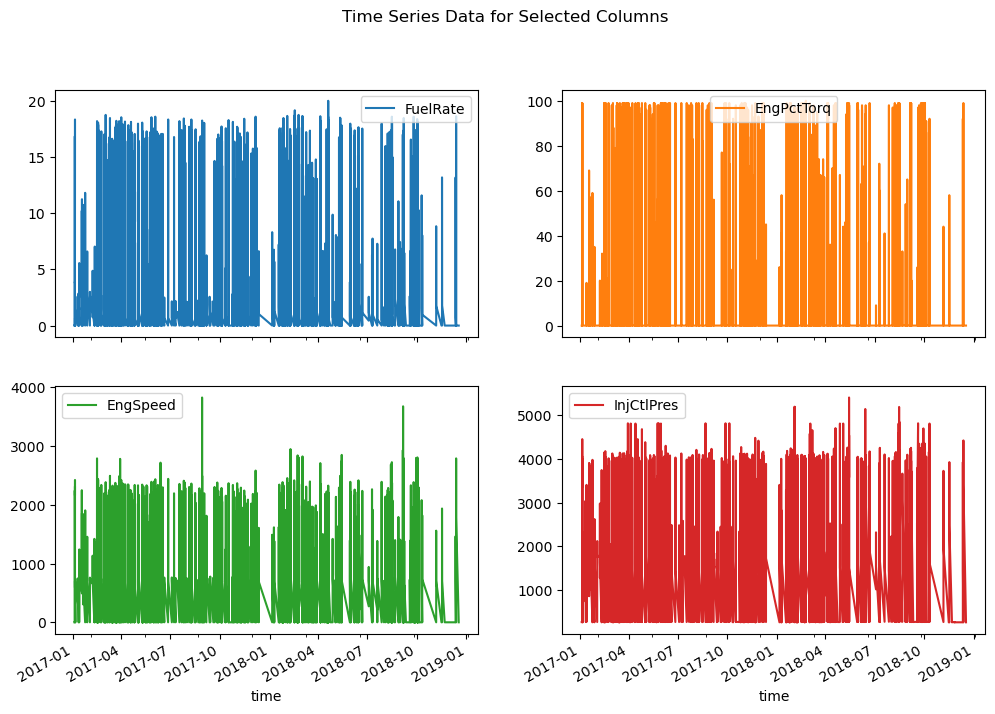

In [35]:
#plot few key columns on time index ['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']
df_2017_2018_selected[['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']].plot(subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Time Series Data for Selected Columns')
plt.show()


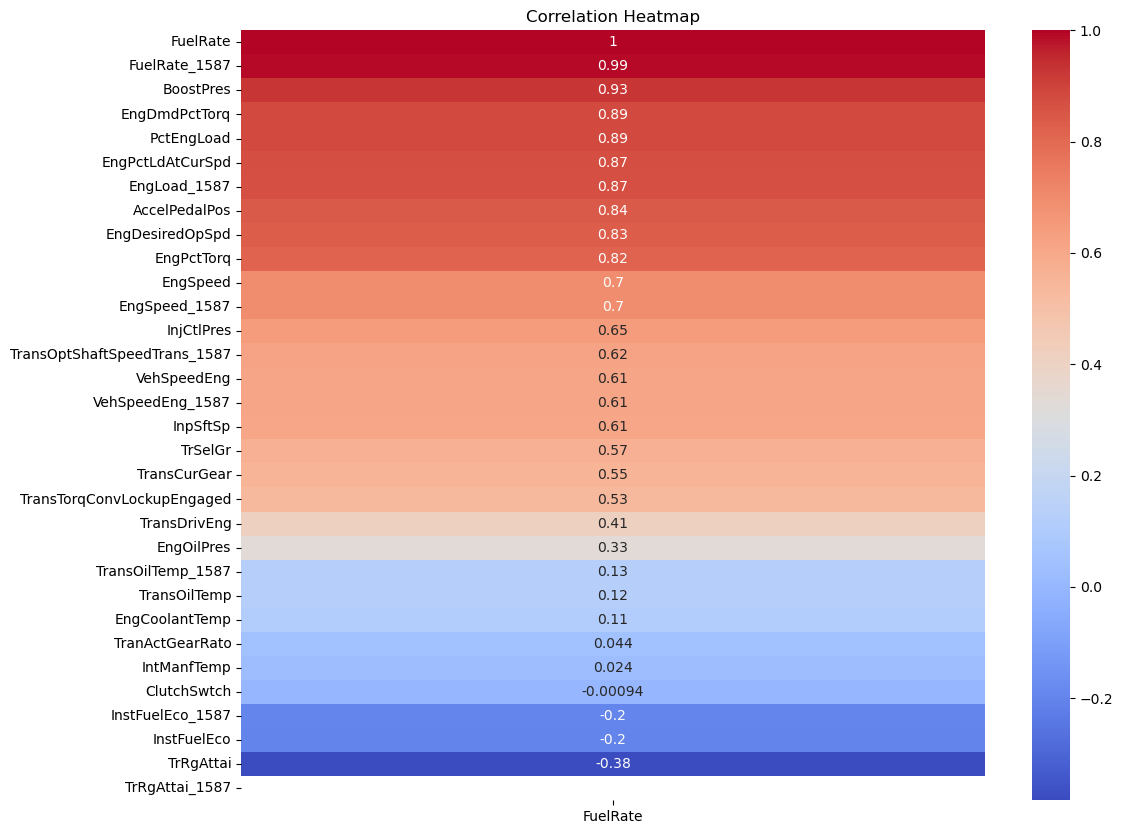

In [36]:
#run a correlation study on the FuelRate as compared to the other columns
correlation = df_2017_2018_selected.corr()
correlation = correlation['FuelRate'].sort_values(ascending=False)
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FuelRate and FuelRate_1587 are the same.  Theefore, you have to eliminate one of the channel from the columns

In [37]:
#select channels that more than .5 correlation with FuelRate
selected_columns_high_correlation = correlation[correlation > 0.1].index.tolist()
display(selected_columns_high_correlation)


['FuelRate',
 'FuelRate_1587',
 'BoostPres',
 'EngDmdPctTorq',
 'PctEngLoad',
 'EngPctLdAtCurSpd',
 'EngLoad_1587',
 'AccelPedalPos',
 'EngDesiredOpSpd',
 'EngPctTorq',
 'EngSpeed',
 'EngSpeed_1587',
 'InjCtlPres',
 'TransOptShaftSpeedTrans_1587',
 'VehSpeedEng',
 'VehSpeedEng_1587',
 'InpSftSp',
 'TrSelGr',
 'TransCurGear',
 'TransTorqConvLockupEngaged',
 'TransDrivEng',
 'EngOilPres',
 'TransOilTemp_1587',
 'TransOilTemp',
 'EngCoolantTemp']

In [38]:
#preproces the data
# VehSpeedEng>0 or < 60
# EngSpeed > 700
# FuelRate > .5
# AccelPedalPos > 0

#create a fubction to preprocess the data
df_2017_2018_selected_high_correlation = df_2017_2018_selected[selected_columns_high_correlation]
def preprocess_data(df):
    df = df[(df['VehSpeedEng'] > 0) & (df['VehSpeedEng'] < 60)]
    df = df[df['EngSpeed'] > 700]
    df = df[df['FuelRate'] > 0.5]
    df = df[df['AccelPedalPos'] > 0]
    return df
df_2017_2018_selected_preprocessed = preprocess_data(df_2017_2018_selected_high_correlation)
#drop duplicate similar columns
#['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng']
df_2017_2018_selected_preprocessed = df_2017_2018_selected_preprocessed.drop(['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng'], axis=1)
df_2017_2018_selected_preprocessed.shape

(305274, 20)

In [39]:
# EDA on the df_2017_2018_selected_preprocessed
ExploratoryDataAnalysis(df_2017_2018_selected_preprocessed)

,null_sum,null_pct,dtypes,count,mean,median,min,max
FuelRate,0,0.0,float64,305274,5.449051,4.623011,0.528344,19.997824
BoostPres,0,0.0,float64,305274,5.178161,2.900800,0.000000,27.267521
EngDmdPctTorq,0,0.0,float64,305274,35.571988,33.000000,0.000000,93.000000
PctEngLoad,0,0.0,float64,305274,35.571981,33.000000,0.000000,93.000000
EngPctLdAtCurSpd,0,0.0,float64,305274,37.732719,33.000000,0.000000,99.000000
EngLoad_1587,0,0.0,float64,305274,36.049100,32.500000,0.000000,99.500000
AccelPedalPos,0,0.0,float64,305274,37.768561,36.400002,0.400000,100.000000
EngDesiredOpSpd,0,0.0,float64,305274,1496.252067,1481.625000,700.000000,2800.000000
EngPctTorq,0,0.0,float64,305274,36.386915,37.000000,0.000000,99.000000
EngSpeed,0,0.0,float64,305274,1430.814738,1479.000000,700.250000,2824.500000


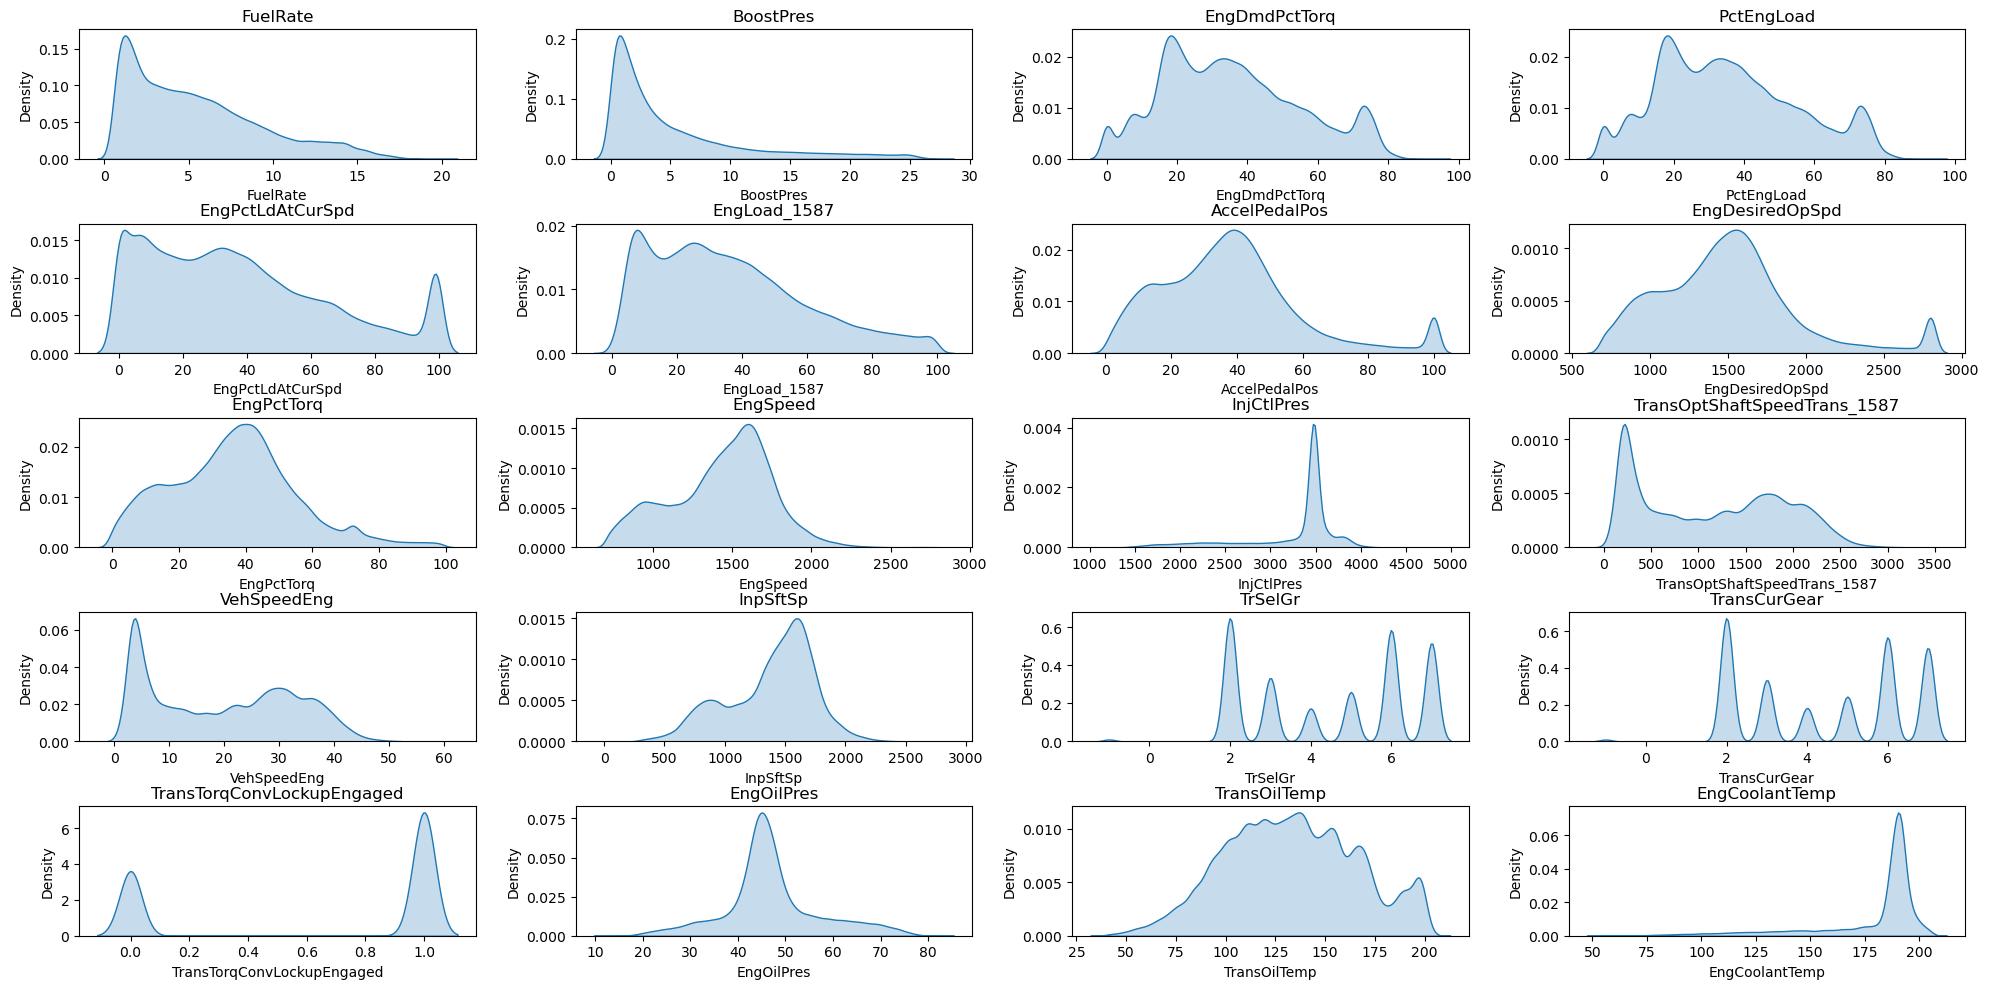

In [40]:
# create 3 by 7 grid, put the kde plot for each column
def kde_plot_3_by_7(df):
    fig, ax = plt.subplots(5, 4, figsize=(20, 10))
    ax = ax.ravel()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], fill =True, ax=ax[i])
        ax[i].set_title(col)
    plt.tight_layout()
    #add space between the plots
    plt.subplots_adjust(hspace=0.5)
    
    plt.show()
kde_plot_3_by_7(df_2017_2018_selected_preprocessed)


In [41]:
#convert the data colums of TrSelGr, TransCurGear, TransTorqConvLockupEngaged as categorical data
df_2017_2018_selected_preprocessed['TrSelGr'] = df_2017_2018_selected_preprocessed['TrSelGr'].astype('category')
df_2017_2018_selected_preprocessed['TransCurGear'] = df_2017_2018_selected_preprocessed['TransCurGear'].astype('category')
df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'] = df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'].astype('category')


In [42]:
#training data
df_2017 = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2017-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-01-01')]
#testing data
df_2018_jan_feb = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-03-01')]
#validation data
df_2018_mar_dec = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-03-01') & (df_2017_2018_selected_preprocessed.index < '2019-01-01')]

print('training data size:', df_2017.shape)
print('testing data size:', df_2018_jan_feb.shape)
print('validation data size:', df_2018_mar_dec.shape)

training data size: (182137, 20)
testing data size: (25894, 20)
validation data size: (97243, 20)


In [43]:
# perform randomforest on this data to predict FuelRate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#split the data into X and y
X_train = df_2017.drop('FuelRate', axis=1)
y_train = df_2017['FuelRate']
X_test = df_2018_jan_feb.drop('FuelRate', axis=1)
y_test = df_2018_jan_feb['FuelRate']

#validate the model
#split the data into X and y
X_val = df_2018_mar_dec.drop('FuelRate', axis=1)
y_val = df_2018_mar_dec['FuelRate']


## Supervised Learning Process - Shubin

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.preprocessing import RobustScaler


In [45]:
# Apply RobustScaler for training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [47]:
import numpy as np
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from joblib import dump

def log_to_csv_and_console(message, log_file='log.csv'):
    print(message)
    with open(log_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([message])

# Polynomial Linear Regression
def poly_regression(X_train, y_train, degrees, cv_fold, scoring):
    best_score = -np.inf
    best_degree = None

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        model = LinearRegression()
        scores = cross_val_score(model, X_train_poly, y_train, cv=cv_fold, scoring=scoring, n_jobs=-1, verbose=2)
        score = np.mean(scores)
        log_to_csv_and_console("[Polynomial Linear Regression] (Processing) Score: %f using %s" % (score, degree))
        if score > best_score:
            best_score = score
            best_degree = degree

    log_to_csv_and_console("[Polynomial Linear Regression] Best score: %f using %s" % (best_score, best_degree))
    return best_degree, best_score

# Random Forest Regression
def random_forest_regression(X_train, y_train, param_grid, cv_fold, scoring):
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_fold, scoring=scoring, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    log_to_csv_and_console("[Random Forest Regression] Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
    return grid_search.best_params_, grid_search.best_score_

# MLP Regression
def mlp_regression(X_train, y_train, param_grid, cv_fold, scoring):
    mlp = MLPRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cv_fold, scoring=scoring, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    log_to_csv_and_console("[MLPRegressor Neural Network] Best score: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
    return grid_search.best_params_, grid_search.best_score_

# Define parameters and perform model training
cv_fold = 5
scoring = "neg_mean_squared_error"
degrees = [2, 3, 4]
# param_grid_rf = {
#                     'n_estimators': [100, 200, 300, 500],
#                     'max_depth': [10, 20, 30, None],
#                     'min_samples_split': [2, 5, 10],
#                     'min_samples_leaf': [1, 2, 4],
#                     'max_features': ['auto', 'sqrt', 'log2'],
#                     'bootstrap': [True, False],
#                 }
param_grid_rf = {
                    'max_features': ['auto', 'sqrt'],
                    'max_depth': [10, 20, None],
                    'n_estimators': [100, 200]
                }
param_grid_mlp = {
                    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
                    'activation': ['tanh', 'relu'], 
                    'solver': ['adam', 'sgd'],
                    'activation': ['relu'], 
                    'solver': ['adam'],
                    'alpha': [0.0001, 0.001],
                    'learning_rate': ['constant', 'adaptive'],
                    'max_iter': [200, 400],
                    'batch_size': [32, 64]
                }

# best_degree, _ = poly_regression(X_train_scaled, y_train, degrees, cv_fold, scoring)
# [Polynomial Linear Regression] (Processing) Score: -0.485464 using 2
# [Polynomial Linear Regression] (Processing) Score: -0.466042 using 3
# [Polynomial Linear Regression] (Processing) Score: -170.844474 using 4
# best_params_rf, _ = random_forest_regression(X_train_scaled, y_train, param_grid_rf, cv_fold, scoring)
# [Random Forest Regression] Best score: -0.438841 using {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
# best_params_mlp, _ = mlp_regression(X_train_scaled, y_train, param_grid_mlp, cv_fold, scoring)
# [MLPRegressor Neural Network] Best score: -0.399627 using {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

# Save the best model
# Polynomial Linear Regression
best_degree, _ = poly_regression(X_train_scaled, y_train, degrees, cv_fold, scoring)
poly_features = PolynomialFeatures(degree=best_degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
dump(poly_model, f'poly_regression.joblib')
dump(poly_features, f'poly_features.joblib')
# Random Forest Regression
best_params_rf, _ = random_forest_regression(X_train_scaled, y_train, param_grid_rf, cv_fold, scoring)
rf_model = RandomForestRegressor(random_state=42, **best_params_rf).fit(X_train_scaled, y_train)
dump(rf_model, 'random_forest_regression.joblib')
# MLP Regression
best_params_mlp, _ = mlp_regression(X_train_scaled, y_train, param_grid_mlp, cv_fold, scoring)
mlp_model = MLPRegressor(random_state=42, **best_params_mlp).fit(X_train_scaled, y_train)
dump(mlp_model, 'mlp_regression.joblib')



In [48]:
# # Best parameters calculated from the previous step
# best_degree = 3
# best_params_rf = {
#                     'max_features': 'sqrt',
#                     'max_depth': None,
#                     'n_estimators': 200
#                 }
# best_params_mlp = {
#                     'hidden_layer_sizes': (50, 50),
#                     'activation': 'relu',
#                     'solver': 'adam',
#                     'alpha': 0.0001,
#                     'learning_rate': 'constant',
#                     'max_iter': 200,
#                     'batch_size': 64
#                 }

# poly_features = PolynomialFeatures(degree=best_degree)
# X_train_poly = poly_features.fit_transform(X_train_scaled)
# poly_model = LinearRegression().fit(X_train_poly, y_train)
# # Random Forest Regression
# rf_model = RandomForestRegressor(random_state=42, **best_params_rf).fit(X_train_scaled, y_train)
# # MLP Regression
# mlp_model = MLPRegressor(random_state=42, **best_params_mlp).fit(X_train_scaled, y_train)

from joblib import load

# Load the trained models from file
poly_model = load('poly_regression.joblib')
poly_features = load('poly_features.joblib')
rf_model = load('random_forest_regression.joblib')
mlp_model = load('mlp_regression.joblib')

In [50]:

X_test_poly = poly_features.transform(X_test_scaled)
y_pred_poly = poly_model.predict(X_test_poly)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_mlp = mlp_model.predict(X_test_scaled)

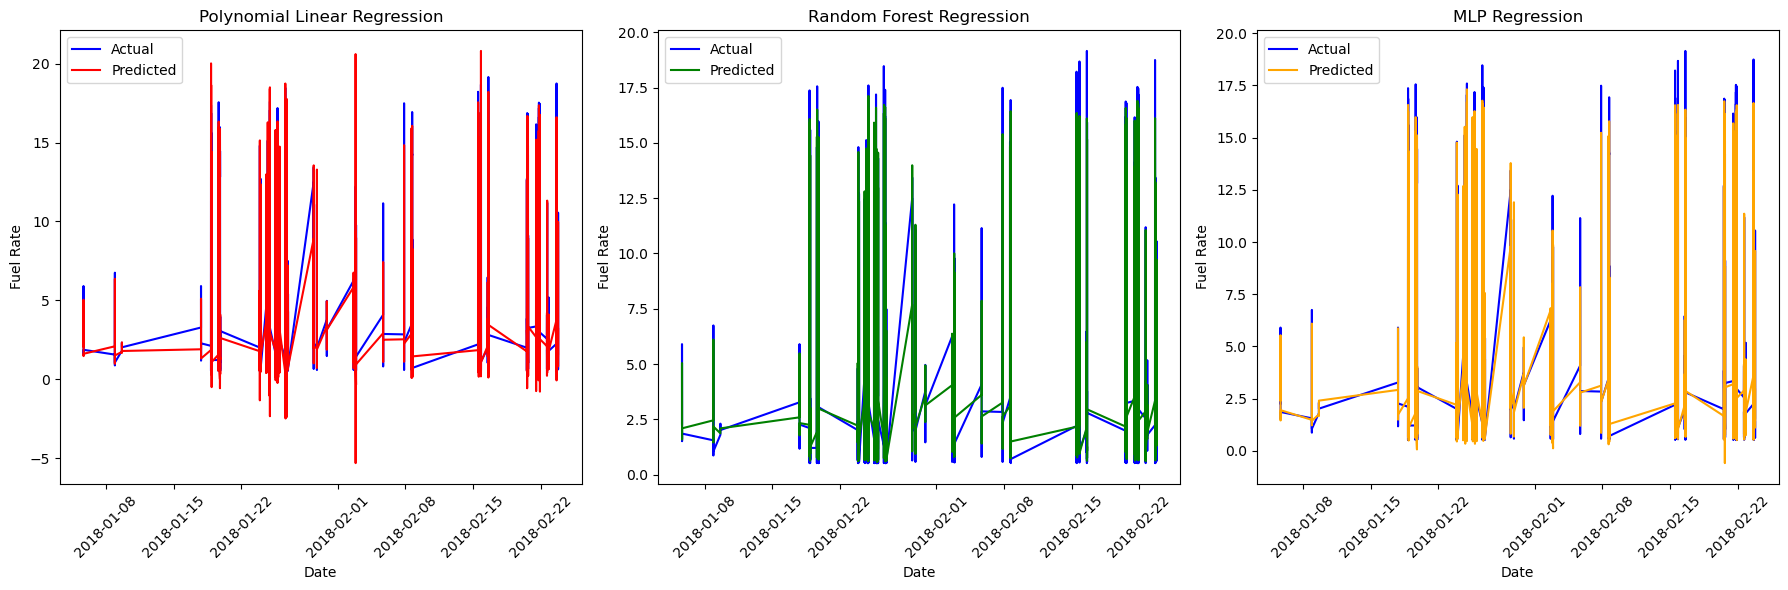

In [51]:
plt.figure(figsize=(18, 6))

# Polynomial Linear Regression Predictions
plt.subplot(1, 3, 1)
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_pred_poly, label='Predicted', color='red')
plt.title('Polynomial Linear Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Random Forest Regression Predictions
plt.subplot(1, 3, 2)
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_pred_rf, label='Predicted', color='green')
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# MLP Regression Predictions
plt.subplot(1, 3, 3)
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_pred_mlp, label='Predicted', color='orange')
plt.title('MLP Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


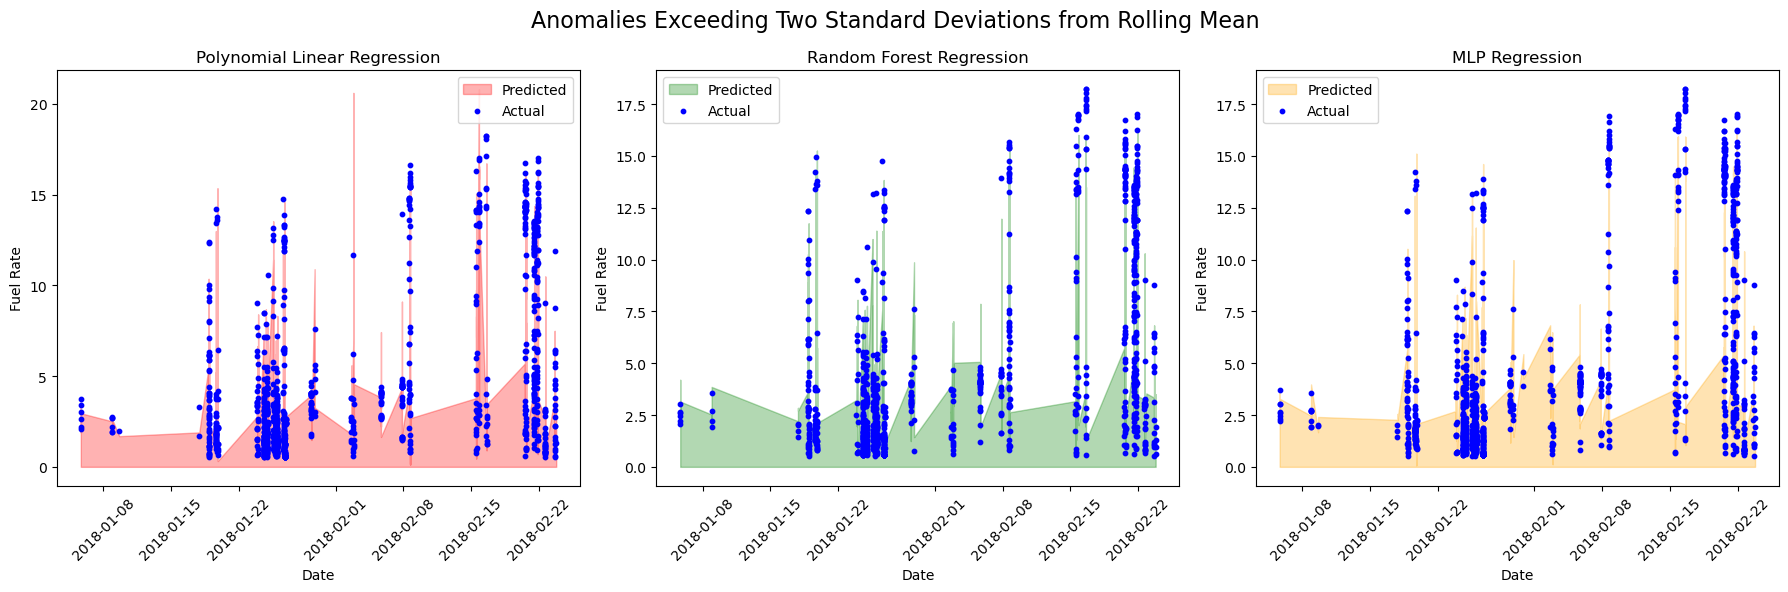

In [52]:
# Calculate the rolling standard deviation of the actual values
window_size = 5
rolling_std_dev = y_test.rolling(window=window_size).std()
# Create masks for data points where the difference is greater than two times the rolling standard deviation
mask_poly = (abs(y_test - pd.Series(y_pred_poly, index=y_test.index)) >= 2 * rolling_std_dev) & (y_pred_poly>0)
mask_rf = (abs(y_test - pd.Series(y_pred_rf, index=y_test.index)) >= 2 * rolling_std_dev) & (y_pred_rf>0)
mask_mlp = (abs(y_test - pd.Series(y_pred_mlp, index=y_test.index)) >= 2 * rolling_std_dev) & (y_pred_mlp>0)

# Apply the masks to filter the data
filtered_actual_poly = y_test[mask_poly]
filtered_pred_poly = pd.Series(y_pred_poly, index=y_test.index)[mask_poly]

filtered_actual_rf = y_test[mask_rf]
filtered_pred_rf = pd.Series(y_pred_rf, index=y_test.index)[mask_rf]

filtered_actual_mlp = y_test[mask_mlp]
filtered_pred_mlp = pd.Series(y_pred_mlp, index=y_test.index)[mask_mlp]

# Plot settings
plt.figure(figsize=(18, 6))

# Polynomial Linear Regression Predictions
plt.subplot(1, 3, 1)
plt.fill_between(filtered_pred_poly.index, filtered_pred_poly, color='red', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_poly.index, filtered_actual_poly, color='blue', label='Actual', s=10)
plt.title('Polynomial Linear Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Random Forest Regression Predictions
plt.subplot(1, 3, 2)
plt.fill_between(filtered_pred_rf.index, filtered_pred_rf, color='green', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_rf.index, filtered_actual_rf, color='blue', label='Actual', s=10)
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# MLP Regression Predictions
plt.subplot(1, 3, 3)
plt.fill_between(filtered_pred_mlp.index, filtered_pred_mlp, color='orange', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_mlp.index, filtered_actual_mlp, color='blue', label='Actual', s=10)
plt.title('MLP Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

plt.suptitle('Anomalies Exceeding Two Standard Deviations from Rolling Mean', fontsize=16)

plt.tight_layout()
plt.show()


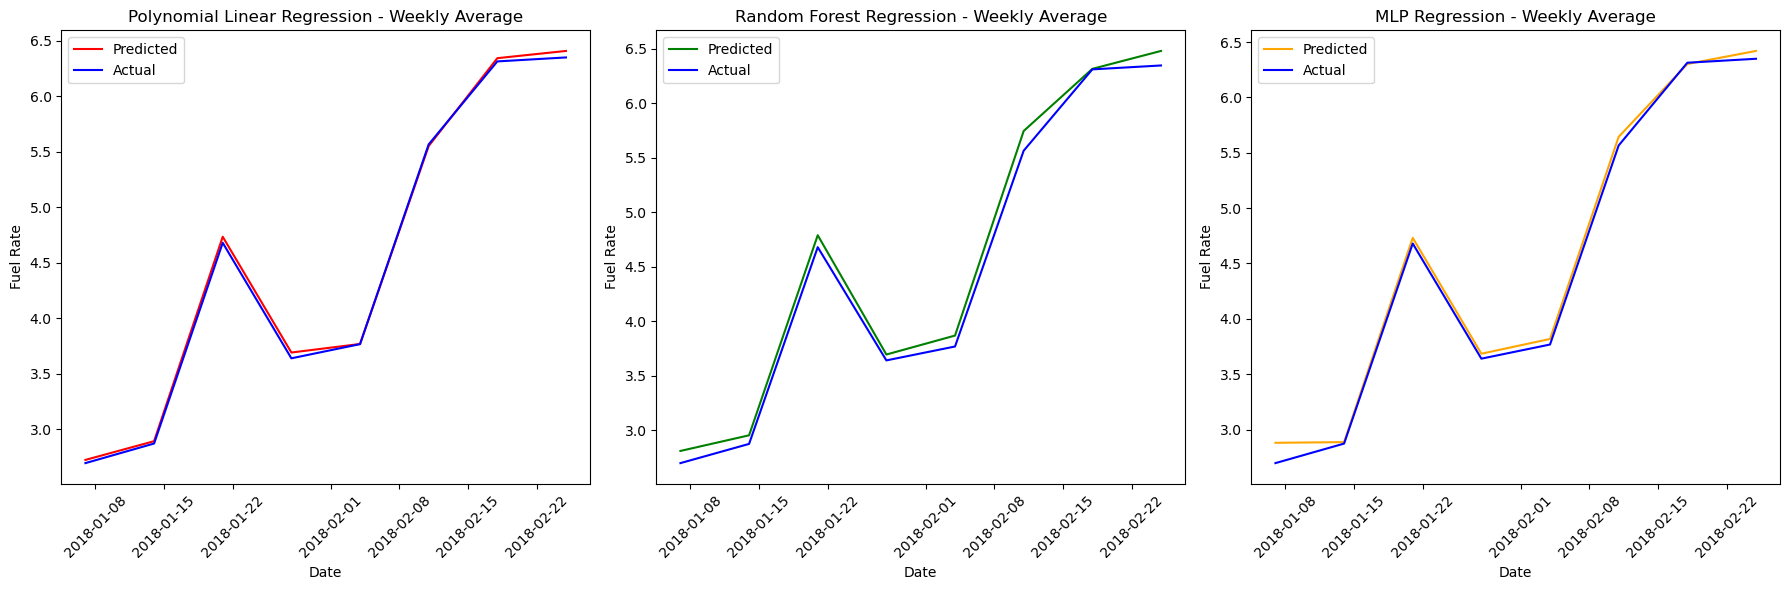

In [53]:
# Resample the actual and predicted data to weekly averages
weekly_actual = y_test.resample('W').mean()
weekly_pred_poly = pd.Series(y_pred_poly, index=y_test.index).resample('W').mean()
weekly_pred_rf = pd.Series(y_pred_rf, index=y_test.index).resample('W').mean()
weekly_pred_mlp = pd.Series(y_pred_mlp, index=y_test.index).resample('W').mean()

plt.figure(figsize=(18, 6))

# Polynomial Linear Regression Predictions
plt.subplot(1, 3, 1)
plt.plot(weekly_pred_poly.index, weekly_pred_poly, label='Predicted', color='red')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('Polynomial Linear Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Random Forest Regression Predictions
plt.subplot(1, 3, 2)
plt.plot(weekly_pred_rf.index, weekly_pred_rf, label='Predicted', color='green')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('Random Forest Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# MLP Regression Predictions
plt.subplot(1, 3, 3)
plt.plot(weekly_pred_mlp.index, weekly_pred_mlp, label='Predicted', color='orange')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('MLP Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
X_val_poly = poly_features.transform(X_val_scaled)
y_val_pred_poly = poly_model.predict(X_val_poly)
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_val_pred_mlp = mlp_model.predict(X_val_scaled)

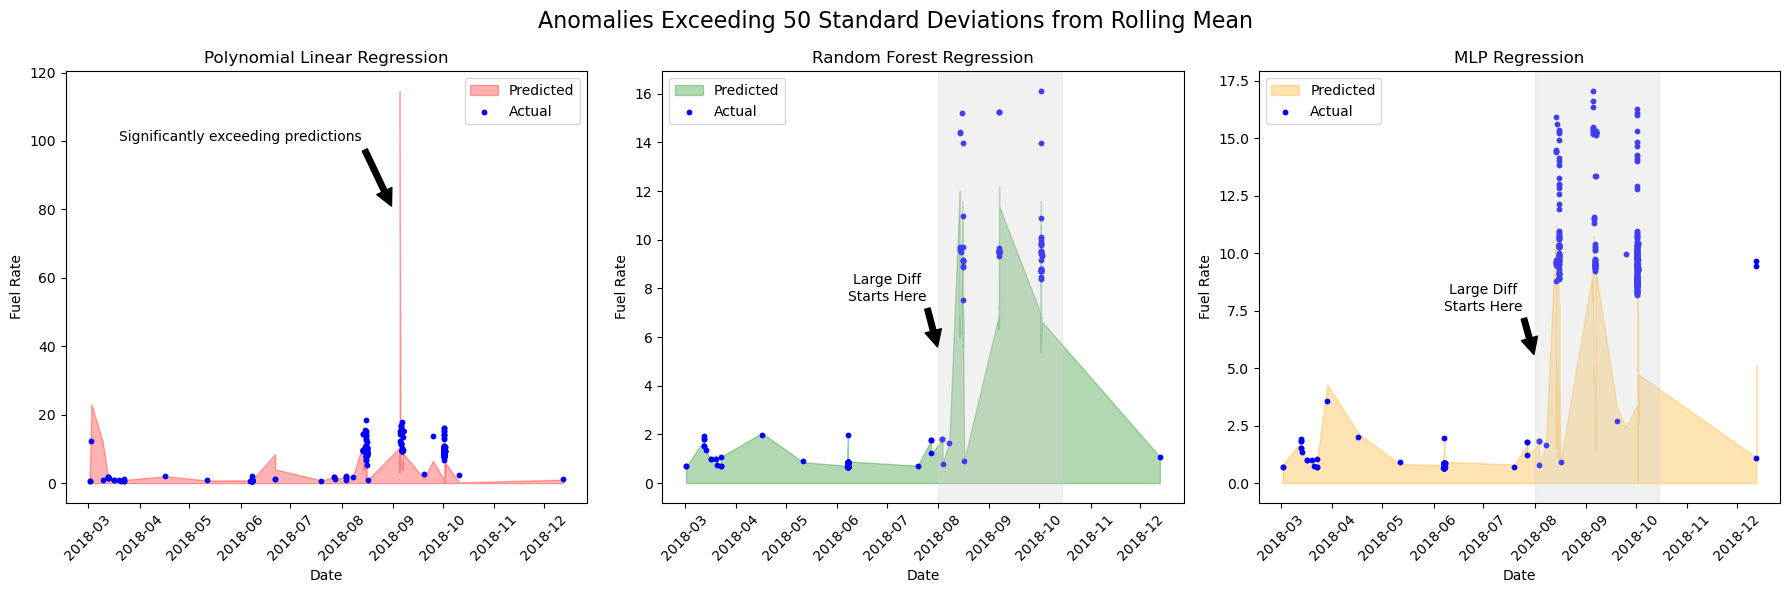

In [56]:
# Calculate the rolling standard deviation of the actual values
window_size = 5
rolling_std_dev = y_val.rolling(window=window_size).std()
# Create masks for data points where the difference is greater than two times the rolling standard deviation
mask_poly = (abs(y_val - pd.Series(y_val_pred_poly, index=y_val.index)) >= 50 * rolling_std_dev) & (y_val_pred_poly>0)
mask_rf = (abs(y_val - pd.Series(y_val_pred_rf, index=y_val.index)) >= 50 * rolling_std_dev) & (y_val_pred_rf>0)
mask_mlp = (abs(y_val - pd.Series(y_val_pred_mlp, index=y_val.index)) >= 50 * rolling_std_dev) & (y_val_pred_mlp>0)

# Apply the masks to filter the data
filtered_actual_poly = y_val[mask_poly]
filtered_pred_poly = pd.Series(y_val_pred_poly, index=y_val.index)[mask_poly]

filtered_actual_rf = y_val[mask_rf]
filtered_pred_rf = pd.Series(y_val_pred_rf, index=y_val.index)[mask_rf]

filtered_actual_mlp = y_val[mask_mlp]
filtered_pred_mlp = pd.Series(y_val_pred_mlp, index=y_val.index)[mask_mlp]

# Plot settings
plt.figure(figsize=(18, 6))

# Polynomial Linear Regression Predictions
plt.subplot(1, 3, 1)
plt.fill_between(filtered_pred_poly.index, filtered_pred_poly, color='red', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_poly.index, filtered_actual_poly, color='blue', label='Actual', s=10)
plt.title('Polynomial Linear Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Random Forest Regression Predictions
plt.subplot(1, 3, 2)
plt.fill_between(filtered_pred_rf.index, filtered_pred_rf, color='green', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_rf.index, filtered_actual_rf, color='blue', label='Actual', s=10)
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# MLP Regression Predictions
plt.subplot(1, 3, 3)
plt.fill_between(filtered_pred_mlp.index, filtered_pred_mlp, color='orange', alpha=0.3, label='Predicted')
plt.scatter(filtered_actual_mlp.index, filtered_actual_mlp, color='blue', label='Actual', s=10)
plt.title('MLP Regression')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Add annotation about the significant deviations
annotate_loc = '2018-07-01'
start_highlight = '2018-08-01'
end_highlight = '2018-10-15'

plt.subplot(1, 3, 1)
plt.annotate('Significantly exceeding predictions', xy=(pd.to_datetime('2018-09-01'), 80),
                xytext=(pd.to_datetime('2018-06-01'),  100),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')

for i in range(2, 4):
        plt.subplot(1, 3, i)
        plt.axvspan(pd.to_datetime(start_highlight), pd.to_datetime(end_highlight), color='lightgrey', alpha=0.3)
        plt.annotate('Large Diff\nStarts Here', xy=(pd.to_datetime(start_highlight), 5.5),
                     xytext=(pd.to_datetime(annotate_loc), 7.5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     ha='center')

plt.suptitle('Anomalies Exceeding 50 Standard Deviations from Rolling Mean', fontsize=16)

plt.tight_layout()
plt.show()


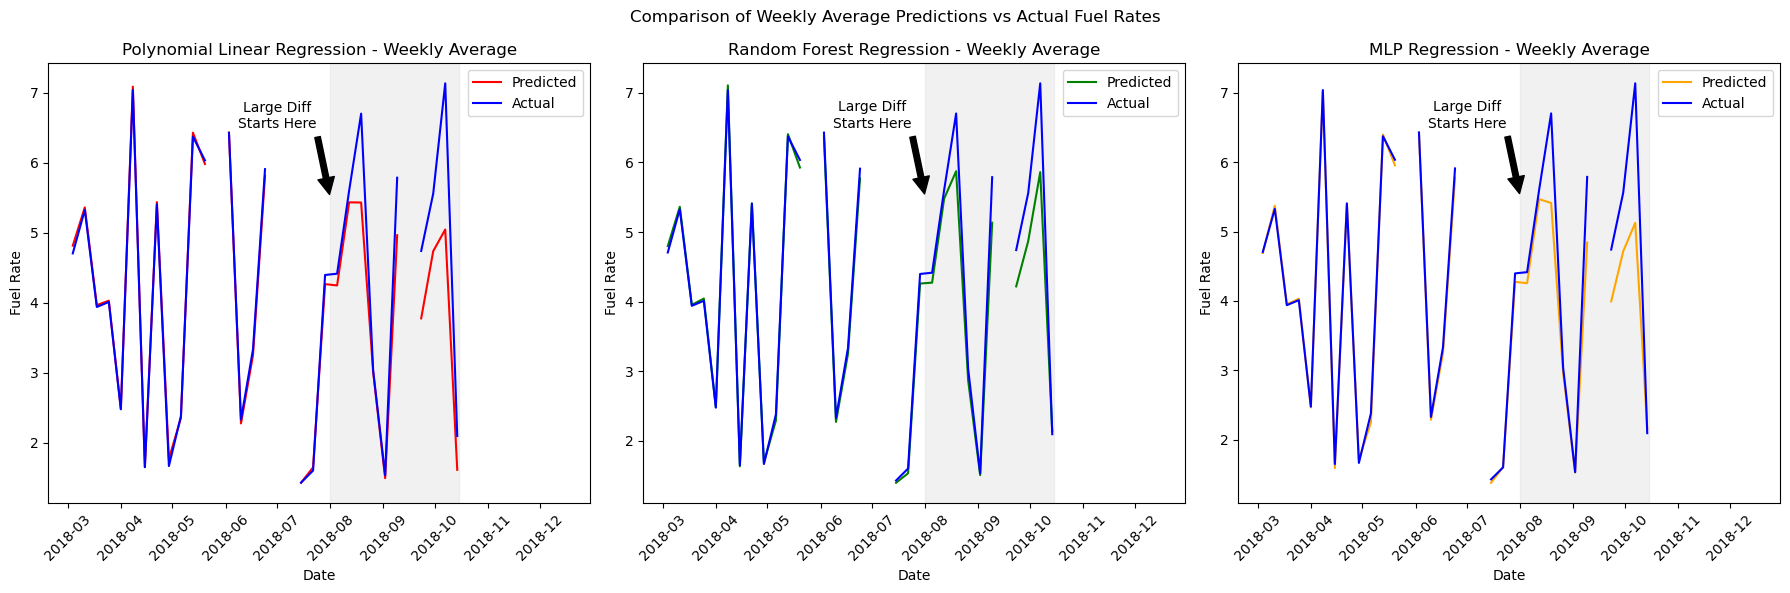

In [58]:
# Resample the actual and predicted data to weekly averages
weekly_actual = y_val.resample('W').mean()
weekly_pred_poly = pd.Series(y_val_pred_poly, index=y_val.index).resample('W').mean()
weekly_pred_rf = pd.Series(y_val_pred_rf, index=y_val.index).resample('W').mean()
weekly_pred_mlp = pd.Series(y_val_pred_mlp, index=y_val.index).resample('W').mean()

plt.figure(figsize=(18, 6))

# Polynomial Linear Regression Predictions
plt.subplot(1, 3, 1)
plt.plot(weekly_pred_poly.index, weekly_pred_poly, label='Predicted', color='red')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('Polynomial Linear Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Random Forest Regression Predictions
plt.subplot(1, 3, 2)
plt.plot(weekly_pred_rf.index, weekly_pred_rf, label='Predicted', color='green')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('Random Forest Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# MLP Regression Predictions
plt.subplot(1, 3, 3)
plt.plot(weekly_pred_mlp.index, weekly_pred_mlp, label='Predicted', color='orange')
plt.plot(weekly_actual.index, weekly_actual, label='Actual', color='blue')
plt.title('MLP Regression - Weekly Average')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.xticks(rotation=45)
plt.legend()

# Add annotation about the significant deviations
annotate_loc = '2018-07-01'
start_highlight = '2018-08-01'
end_highlight = '2018-10-15'

for i in range(1, 4):
        plt.subplot(1, 3, i)
        plt.axvspan(pd.to_datetime(start_highlight), pd.to_datetime(end_highlight), color='lightgrey', alpha=0.3)
        plt.annotate('Large Diff\nStarts Here', xy=(pd.to_datetime(start_highlight), 5.5),
                     xytext=(pd.to_datetime(annotate_loc), 6.5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     ha='center')

plt.suptitle('Comparison of Weekly Average Predictions vs Actual Fuel Rates')

plt.tight_layout()
plt.show()


/opt/anaconda3/envs/env39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


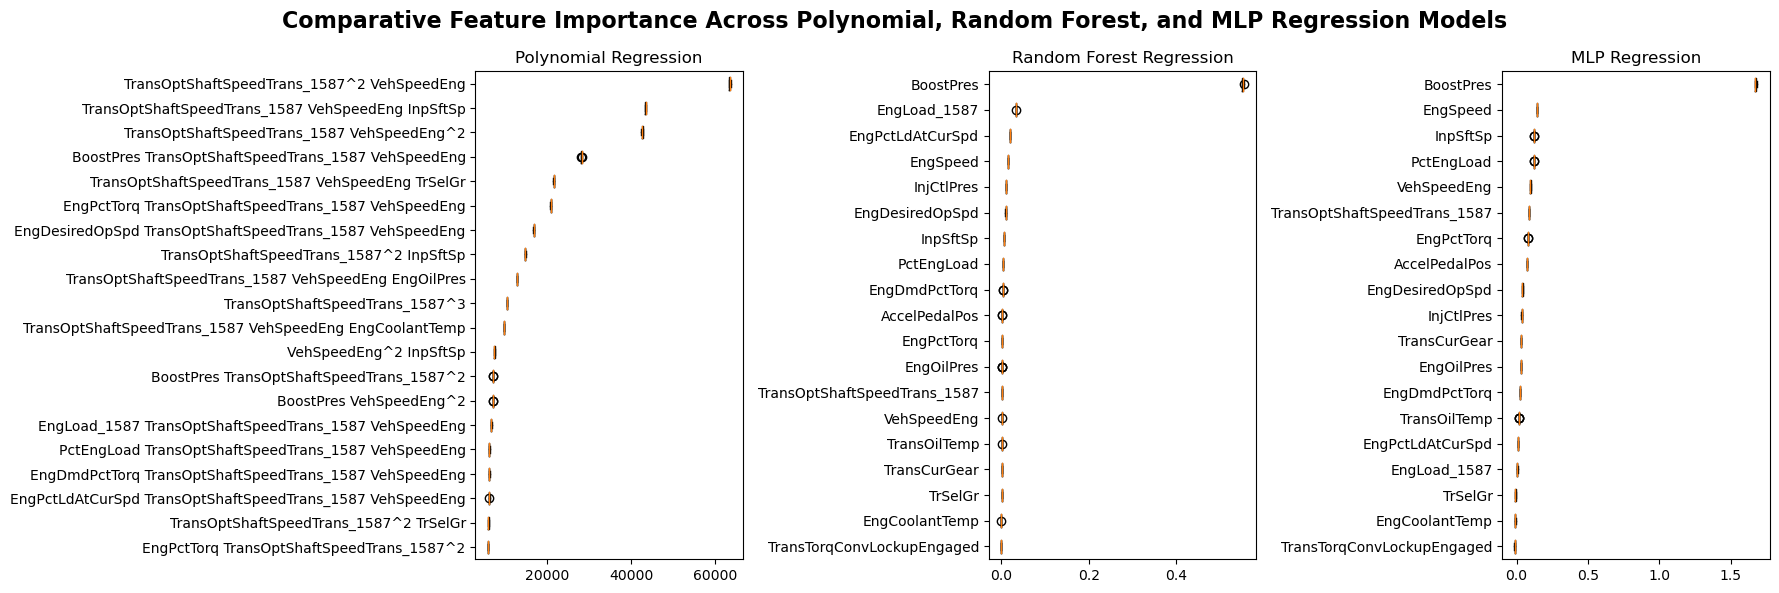

In [60]:
# https://medium.com/@T_Jen/feature-importance-for-any-model-using-permutation-7997b7287aa

from sklearn.inspection import permutation_importance

# Function to calculate permutation importance and plot it
def plot_permutation_importance(model, X, y, ax, feature_names, title, top_n_features=20):

    results = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    
    # Sort the features by importance
    sorted_idx = results.importances_mean.argsort()
    if top_n_features > len(sorted_idx):
        top_n_features = len(sorted_idx)
    sorted_idx_top = sorted_idx[-top_n_features:]

    sorted_feature_names = [feature_names[i] for i in sorted_idx_top] if feature_names is not None else sorted_idx_top

    ax.boxplot(results.importances[sorted_idx_top].T, vert=False, labels=sorted_feature_names)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparative Feature Importance Across Polynomial, Random Forest, and MLP Regression Models', fontsize=16, fontweight='bold')

feature_names = X_val.columns
# feature_names_poly = poly_features.get_feature_names_out(input_features=X_val.columns)
try:
    feature_names_poly = poly_features.get_feature_names_out(input_features=X_val.columns)
except AttributeError:
    feature_names_poly = poly_features.get_feature_names(input_features=X_val.columns)
# Polynomial Regression model
plot_permutation_importance(poly_model, X_val_poly, y_val, axs[0], feature_names_poly, "Polynomial Regression")
# Random Forest model
plot_permutation_importance(rf_model, X_val_scaled, y_val, axs[1], feature_names, "Random Forest Regression")
# MLP Regression model
plot_permutation_importance(mlp_model, X_val_scaled, y_val, axs[2], feature_names, "MLP Regression")

plt.tight_layout()
plt.show()

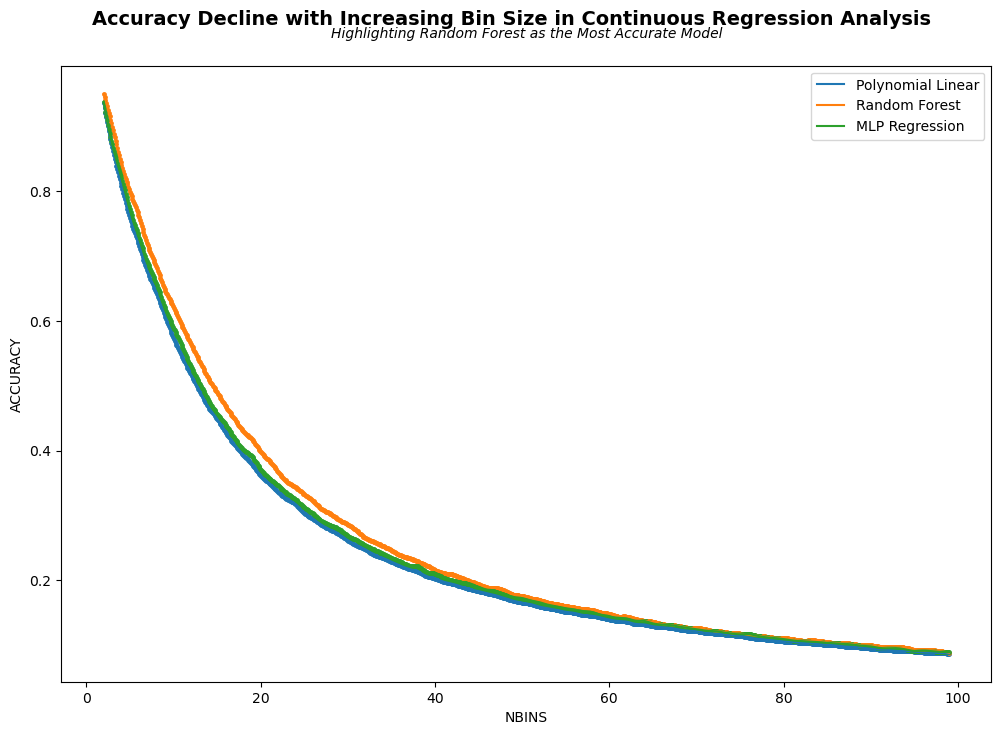

In [61]:
# https://medium.com/@dave.cote.msc/experimenting-confusion-matrix-for-regression-a-powerfull-model-analysis-tool-7c288d99d437

from sklearn.metrics import accuracy_score
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Define the range of bin counts to test
bin_counts = np.arange(2, 100) 

df_accuracy_poly = pd.DataFrame(columns=['NBINS', 'ACCURACY'])
df_accuracy_rf = pd.DataFrame(columns=['NBINS', 'ACCURACY'])
df_accuracy_mlp = pd.DataFrame(columns=['NBINS', 'ACCURACY'])

# Calculate accuracies for each bin count and store in the corresponding dataframe
for nbins in bin_counts:
    # Discretize the actual and predicted values
    y_true_binned = pd.qcut(y_val, q=nbins, labels=False, duplicates='drop')
    y_pred_poly_binned = pd.qcut(y_val_pred_poly, q=nbins, labels=False, duplicates='drop')
    y_pred_rf_binned = pd.qcut(y_val_pred_rf, q=nbins, labels=False, duplicates='drop')
    y_pred_mlp_binned = pd.qcut(y_val_pred_mlp, q=nbins, labels=False, duplicates='drop')
    
    # Calculate accuracy for each model
    accuracy_poly = accuracy_score(y_true_binned, y_pred_poly_binned)
    accuracy_rf = accuracy_score(y_true_binned, y_pred_rf_binned)
    accuracy_mlp = accuracy_score(y_true_binned, y_pred_mlp_binned)
    
    # Store the results
    df_accuracy_poly = df_accuracy_poly.append({'NBINS': nbins, 'ACCURACY': accuracy_poly}, ignore_index=True)
    df_accuracy_rf = df_accuracy_rf.append({'NBINS': nbins, 'ACCURACY': accuracy_rf}, ignore_index=True)
    df_accuracy_mlp = df_accuracy_mlp.append({'NBINS': nbins, 'ACCURACY': accuracy_mlp}, ignore_index=True)

# Interpolate accuracies for plotting
f_poly = interp1d(df_accuracy_poly['NBINS'], df_accuracy_poly['ACCURACY'], kind='quadratic')
f_rf = interp1d(df_accuracy_rf['NBINS'], df_accuracy_rf['ACCURACY'], kind='quadratic')
f_mlp = interp1d(df_accuracy_mlp['NBINS'], df_accuracy_mlp['ACCURACY'], kind='quadratic')

# Create the x-axis for plotting
bins_poly = np.linspace(bin_counts.min(), bin_counts.max(), 1000)
y_poly = f_poly(bins_poly)
bins_rf = np.linspace(bin_counts.min(), bin_counts.max(), 1000)
y_rf = f_rf(bins_rf)
bins_mlp = np.linspace(bin_counts.min(), bin_counts.max(), 1000)
y_mlp = f_mlp(bins_mlp)

# Plot the results
with plt.rc_context({'figure.facecolor': 'white'}):
    fig, ax = plt.subplots(figsize = (12, 8))
    fig.suptitle('Accuracy Decline with Increasing Bin Size in Continuous Regression Analysis', fontsize=14, fontweight='bold', y=0.95)
    ax.set_title('Highlighting Random Forest as the Most Accurate Model', fontsize=10, style='italic', pad=20)
    ax.set_ylabel('ACCURACY')
    ax.set_xlabel('NBINS' )
    ax.plot(bins_poly, y_poly, label = 'Polynomial Linear' )
    ax.scatter(bins_poly, y_poly, s = 6)
    ax.plot(bins_rf, y_rf, label = 'Random Forest')
    ax.scatter (bins_rf, y_rf, s = 6)
    ax.plot(bins_mlp, y_mlp, label = 'MLP Regression' )
    ax.scatter (bins_mlp, y_mlp, s = 6)
    plt.legend()
    plt.show()

# # Create the x-axis for plotting
# new_bins = np.linspace(bin_counts.min(), bin_counts.max(), 1000)

# # Plot the results
# plt.figure(figsize=(12, 8))
# plt.plot(new_bins, f_poly(new_bins), label='Linear Regression')
# plt.plot(new_bins, f_rf(new_bins), label='CatBoost')
# plt.plot(new_bins, f_poly(new_bins), label='Polynomial Regression')
# # plt.scatter(df_accuracy_poly['NBINS'], df_accuracy_poly['ACCURACY'])  # Add actual data points
# # plt.scatter(df_accuracy_rf['NBINS'], df_accuracy_rf['ACCURACY'])  # Add actual data points
# # plt.scatter(df_accuracy_mlp['NBINS'], df_accuracy_mlp['ACCURACY'])  # Add actual data points
# plt.title('Accuracy vs. Number of Bins')
# plt.xlabel('NBINS')
# plt.ylabel('ACCURACY')
# plt.legend()
# plt.show()

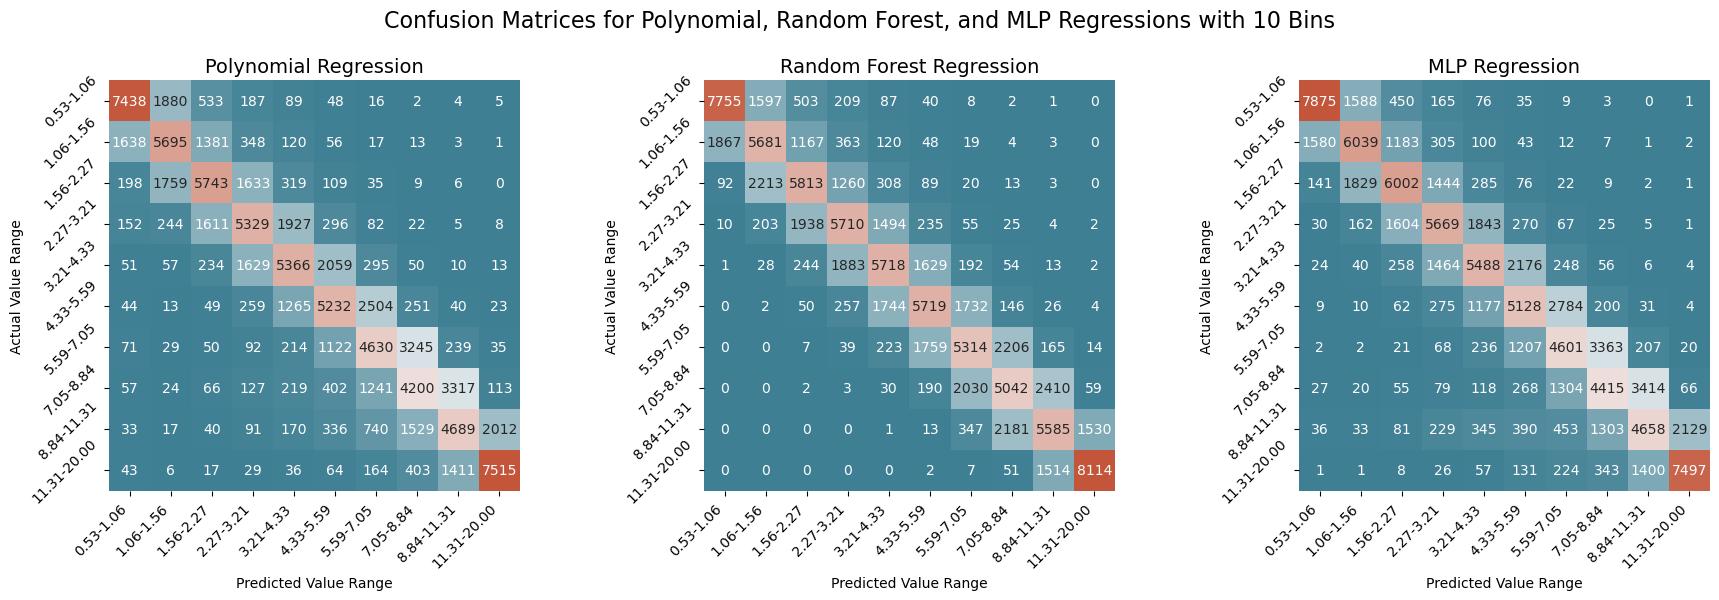

In [70]:
from sklearn.metrics import confusion_matrix

nbins = 10

# Discretize the actual and predicted values
y_true_binned, bins = pd.qcut(y_val, q=nbins, labels=False, duplicates='drop', retbins=True)
y_pred_poly_binned = pd.qcut(y_val_pred_poly, q=nbins, labels=False, duplicates='drop')
y_pred_rf_binned = pd.qcut(y_val_pred_rf, q=nbins, labels=False, duplicates='drop')
y_pred_mlp_binned = pd.qcut(y_val_pred_mlp, q=nbins, labels=False, duplicates='drop')

cm_poly = confusion_matrix(y_true_binned, y_pred_poly_binned)
cm_rf = confusion_matrix(y_true_binned, y_pred_rf_binned)
cm_mlp = confusion_matrix(y_true_binned, y_pred_mlp_binned)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Confusion Matrices for Polynomial, Random Forest, and MLP Regressions with 10 Bins', fontsize=16)

cmap = sns.diverging_palette(220, 20, as_cmap=True)

titles = ['Polynomial Regression', 'Random Forest Regression', 'MLP Regression']
cms = [cm_poly, cm_rf, cm_mlp]

bin_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]

for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=False, square=True)
    ax.set_title(title, fontsize=14)
    # Set labels if necessary
    ax.set_xlabel('Predicted Value Range')
    ax.set_ylabel('Actual Value Range')
    ax.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax.set_yticklabels(bin_labels, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the rect to make space for the suptitle
plt.show()


/opt/anaconda3/envs/env39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env39/li

                MSE  MAPE    R2  Accuracy Accuracy (95% CI)
Model                                                      
Polynomial     3.17  0.19  0.80      0.95   0.95 (+/- 0.04)
Random Forest  1.12  0.16  0.93      0.96   0.96 (+/- 0.02)
MLP            2.26  0.17  0.86      0.96   0.96 (+/- 0.04)


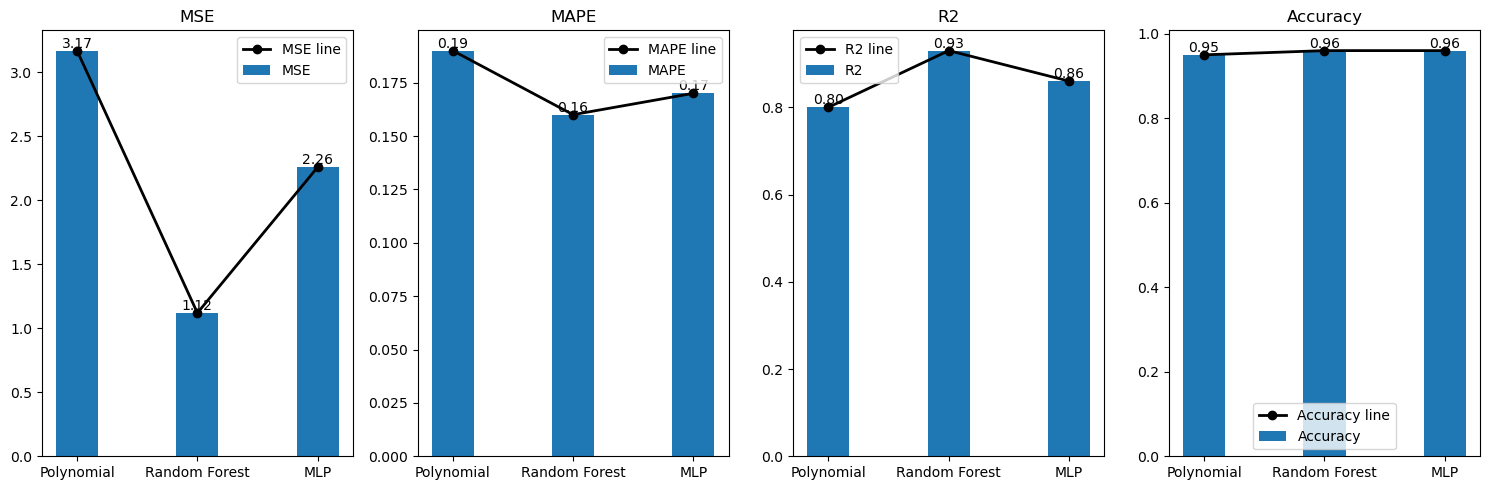

In [81]:
# https://github.com/LNSOTOM/forestGISML/blob/master/polynomial_regression.py

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def evaluate_model(model, X, y, y_pred, cv=10):
    # Cross-validation for R2
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    score_mean = round(scores.mean(), 2)
    score_std = round(scores.std(), 2)

    # Calculate other metrics
    mse = round(mean_squared_error(y, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y, y_pred), 2)
    r2 = round(r2_score(y, y_pred), 2)

    metrics = {
        'MSE': mse,
        'MAPE': mape,
        'R2': r2,
        'Accuracy': score_mean,
        'Accuracy (95% CI)': f"{score_mean} (+/- {2 * score_std})"
    }
    return metrics

results = []
models = [('Polynomial', poly_model, X_val_poly, y_val_pred_poly),
          ('Random Forest', rf_model, X_val_scaled, y_val_pred_rf),
          ('MLP', mlp_model, X_val_scaled, y_val_pred_mlp)]

for name, model, X, y_pred in models:
    result = evaluate_model(model, X, y_val, y_pred)
    result['Model'] = name
    results.append(result)

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.to_csv('model_performance_comparison.csv', index=True)
print(results_df)

models = results_df.index
# exclude "Accuracy (95% CI)"
metrics = results_df.columns[:-1]

fig, ax = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):
    model_scores = results_df[metric].values
    ax[i].bar(index, model_scores, bar_width, label=metric)

    # Add a line chart on the same axis
    ax[i].plot(index, model_scores, color='k', marker='o', linestyle='-', linewidth=2, markersize=6, label=f'{metric} line')

    # Annotate each line point with its value
    for j, value in enumerate(model_scores):
        ax[i].text(index[j], value, f'{value:.2f}', ha='center', va='bottom')

    ax[i].set_title(metric)
    ax[i].set_xticks(index)
    # ax[i].set_xticklabels(models, rotation=45)
    ax[i].set_xticklabels(models)
    ax[i].legend()

plt.tight_layout()
plt.show()